In [12]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
#import nltk
#nltk.download('wordnet')
import regex
import spacy
from collections import Counter
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
df = pd.read_csv('tweets.csv')

In [121]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,airline_cat,airline_sentiment_cat,negativereason_cat
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),5,1,-1
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),5,2,-1
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),5,1,-1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),5,0,0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),5,0,1


In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [519]:
df['user_timezone'] = df['user_timezone'].fillna(method='ffill')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   14640 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB
None


In [807]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [588]:
c= dict(df['user_timezone'].value_counts().head(10))
c1 = list(c.keys())
c2 = list(c.values())
print(c1,c2)

['Eastern Time (US & Canada)', 'Central Time (US & Canada)', 'Pacific Time (US & Canada)', 'Quito', 'Atlantic Time (Canada)', 'Mountain Time (US & Canada)', 'Arizona', 'London', 'Alaska', 'Sydney'] [5551, 2930, 1803, 1093, 747, 547, 322, 291, 158, 151]


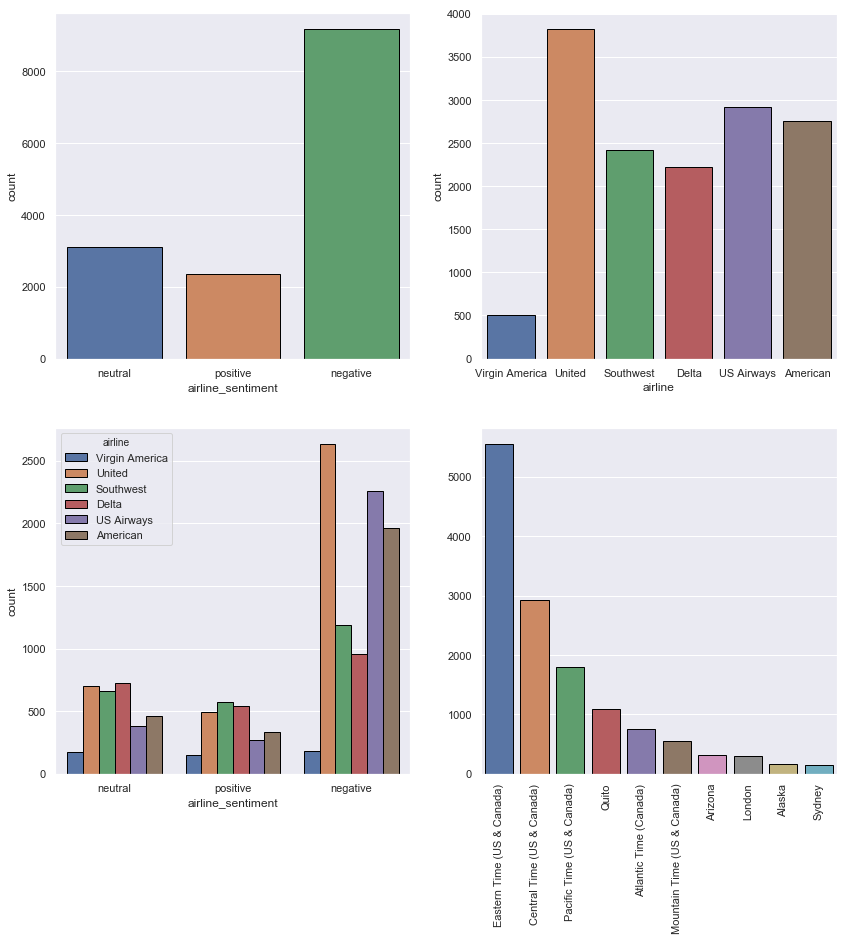

In [638]:
import seaborn as sns
f = plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
sns.countplot(x='airline_sentiment',data=df,edgecolor='black')
plt.subplot(2,2,2)
sns.countplot(x='airline',data=df,edgecolor='black')
plt.subplot(2,2,3)
sns.countplot(x='airline_sentiment',data=df,hue='airline',edgecolor='black')
plt.subplot(2,2,4)
ax = sns.barplot(c1,c2,edgecolor='black')
ax.set_xticklabels(c1,rotation=90)

plt.show()

In [606]:
reason = dict(df['negativereason'].value_counts(dropna=True))
reason1 = list(reason.keys())
reason2 = list(reason.values())
print(reason1,reason2)

['Customer Service Issue', 'Late Flight', "Can't Tell", 'Cancelled Flight', 'Lost Luggage', 'Bad Flight', 'Flight Booking Problems', 'Flight Attendant Complaints', 'longlines', 'Damaged Luggage'] [2910, 1665, 1190, 847, 724, 580, 529, 481, 178, 74]


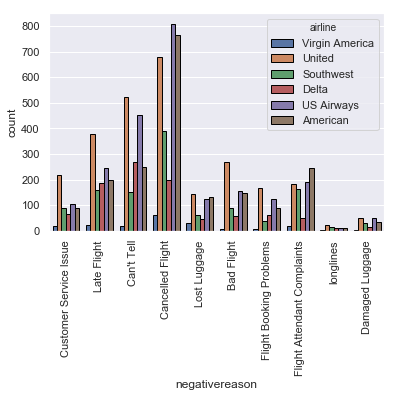

In [614]:
ax= sns.countplot(x='negativereason',data=df,hue='airline',edgecolor='black')
ax.set_xticklabels(reason1,rotation=90)
plt.show()

In [5]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [7]:
# Downsample majority class
from sklearn.utils import resample
df_majority = df[df.airline_sentiment=='negative']
df_minority = df[df.airline_sentiment=='positive']
 
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2363,     # to match minority class
                                 random_state=123) # reproducible results



# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_majority = df[df.airline_sentiment=='neutral']
df_minority = df_downsampled[df_downsampled.airline_sentiment=='positive']
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2363,     # to match minority class
                                 random_state=123) # reproducible results
df_downsampled = pd.concat([df_majority_downsampled, df_downsampled])

# Display new class counts
df_downsampled.airline_sentiment.value_counts()


positive    2363
neutral     2363
negative    2363
Name: airline_sentiment, dtype: int64

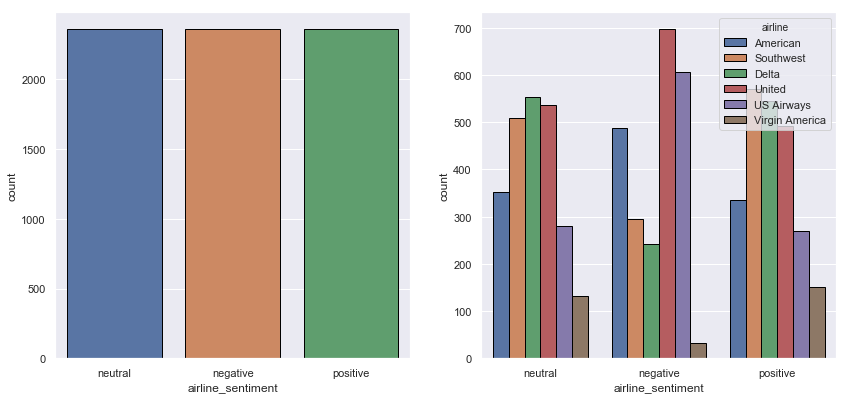

In [31]:
import seaborn as sns
f = plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
sns.countplot(x='airline_sentiment',data=df_downsampled,edgecolor='black')
plt.subplot(2,2,2)
sns.countplot(x='airline_sentiment',data=df_downsampled,hue='airline',edgecolor='black')
sns.set_style('darkgrid')
plt.show()

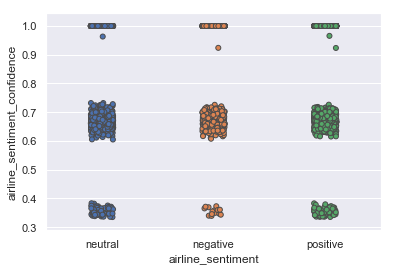

In [30]:
_ = sns.stripplot(x='airline_sentiment',y='airline_sentiment_confidence',data=df_downsampled,jitter=True,linewidth=1,dodge=True)
sns.set_style('darkgrid')

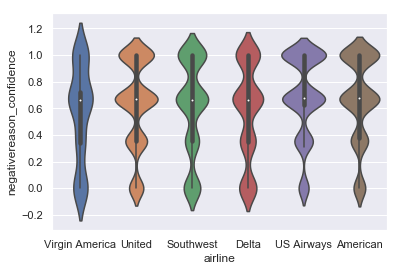

In [870]:
_ = sns.violinplot(x='airline',y='negativereason_confidence',data=df)


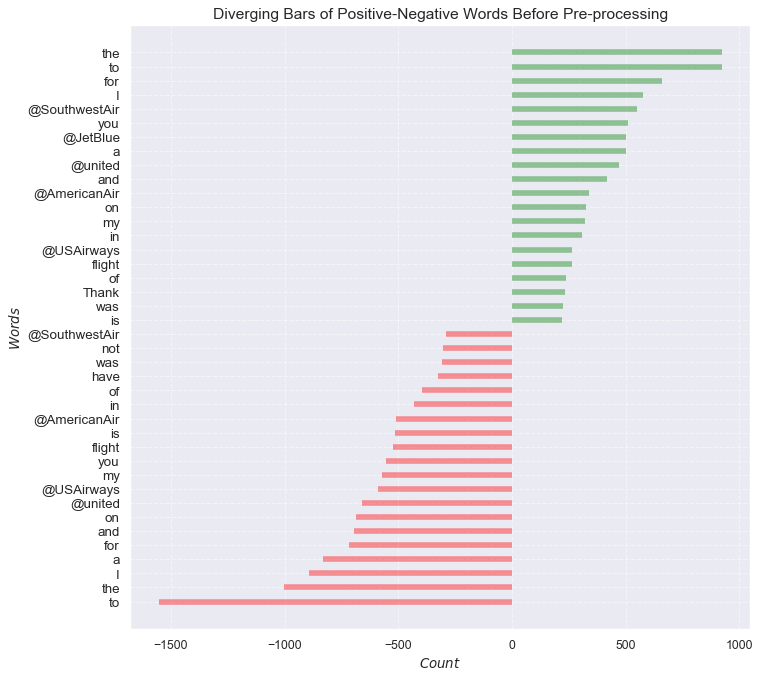

In [29]:
pos = df_downsampled[df_downsampled['airline_sentiment'] == 'positive']
neg = df_downsampled[df_downsampled['airline_sentiment'] == 'negative']

posbiglist = [word.split() for word in pos['text']]
negbiglist = [word.split() for word in neg['text']]

poslist = []
neglist = []
for sublist in posbiglist:
    for word in sublist:
        poslist.append(word)

for sublist in negbiglist:
    for word in sublist:
        neglist.append(word)
    
pos_count = Counter(poslist)
neg_count = Counter(neglist)

pos_mc = pos_count.most_common(20)
neg_mc = neg_count.most_common(20)

a = pd.DataFrame.from_records(pos_mc,columns=['Word','Counts'])
b = pd.DataFrame.from_records(neg_mc,columns=['Word','Counts'])
b['Counts'] = -b['Counts']
c = a.append(b,ignore_index=True)
c['colors'] = ['red' if x < 0 else 'green' for x in c['Counts']]
c.sort_values('Counts',inplace = True)
c.reset_index(inplace=True)


# Draw plot
plt.figure(figsize=(10,10), dpi= 80)
plt.hlines(y=c.index, xmin=0, xmax=c.Counts, color=c.colors, alpha=0.4, linewidth=5)
sns.set_style('darkgrid')
# Decorations
plt.gca().set(ylabel='$Words$', xlabel='$Count$')
plt.yticks(c.index, c.Word, fontsize=12)
plt.title('Diverging Bars of Positive-Negative Words Before Pre-processing', fontdict={'size':14})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

In [165]:

nlp = spacy.load('en')

def NER(tweets):
    
    tweets = re.sub(r'[^a-zA-z\s]','',tweets)
 
    return tweets

cleanlist = df_downsampled['text'].head(40).apply(lambda tweets: NER(tweets))
cleanlist = nlp(str(cleanlist.to_list())) 
for ent in cleanlist.ents:
    print(str(ent.label_) + ' : ' + str(ent) )

NORP : AmericanAir
ORG : Arrive C
LOC : Breakfast
ORG : Portland Sun
LOC : Southwest
PERSON : AmericanAir
TIME : tomorrow morning'
ORG : AmericanAir
DATE : yesterday
ORG : AmericanAir
TIME : minutes
GPE : DMed
PERSON : Richard P Literally
ORG : Awful'
ORG : AmericanAir
ORG : VirginAmerica
ORG : MayweatherPacquiao
PRODUCT : SouthwestAir
ORG : VirginAmerica
ORG : AmericanAir
GPE : Hawaii
PERSON : AmericanAir
ORG : AmericanAir
ORG : FARE
ORG : AmericanAir
ORG : EXP
ORG : AmericanAir
CARDINAL : one
PERSON : AmericanAir
NORP : ABI
DATE : tomorrow
DATE : today
ORG : IAH
ORG : AmericanAir
TIME : this evening
TIME : tomorrow afternoon'
ORG : CompanionPasses
GPE : Atlanta
ORG : UNITED
GPE : Malaysia
ORG : United Airlines
GPE : Kuala Lumpur  KUL '
GPE : Haiti
CARDINAL : hundreds


In [167]:
from spacy import displacy

displacy.render(cleanlist, style="ent")

In [168]:
dep = nlp(str(df_downsampled['text'].tail(2).to_list()))

displacy.render(dep, style="dep",options= {'distance': 90,"word_spacing":20, 
                             "arrow_spacing":10, 
                             "arrow_stroke": 2, 
                             "arrow_width": 5,"compact": False,})

In [32]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", 
                    "could've": "could have", "couldn't": "could not", "didn't": "did not",  
                    "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", 
                    "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", 
                    "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                    "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                    "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                    "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", 
                    "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have",
                    "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                    "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", 
                    "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", 
                    "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": 
                    "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have",
                    "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                    "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
                    "that'd": "that would", "that'd've": "that would have", "that's": "that is",
                    "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
                    "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
                    "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                    "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", 
                    "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have",
                    "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", 
                    "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have",
                    "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                    "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", 
                    "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                    "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                    "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                    "you'll've": "you will have", "you're": "you are", "you've": "you have"}



In [33]:
def expand(text):
    x = ''   
    for t in text.split():
        if t in contraction_dict.keys():
            t = contraction_dict[t]
        x = x + ' ' + t
    return x  

In [34]:
def tweet_to_words(raw_tweet):
    tweets = expand(raw_tweet)
    tweets = re.sub(r'(\w)(\1{2,})', r'\1',tweets)
    letters_only = re.sub("[^a-zA-Z]", " ",tweets) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    meaningful_words = [word for word in meaningful_words if len(word) > 2] 
    meaningful_words = [word for word in meaningful_words
                            if 'http' not in word
                                and 'www' not in word]
                                
    lemmatizer = WordNetLemmatizer()
    meaningful_words = [lemmatizer.lemmatize(word) for word in meaningful_words]
    
    return( " ".join( meaningful_words ))

In [35]:
df_downsampled['cleaned_text'] = df_downsampled.text.apply(lambda tweets: tweet_to_words(tweets))

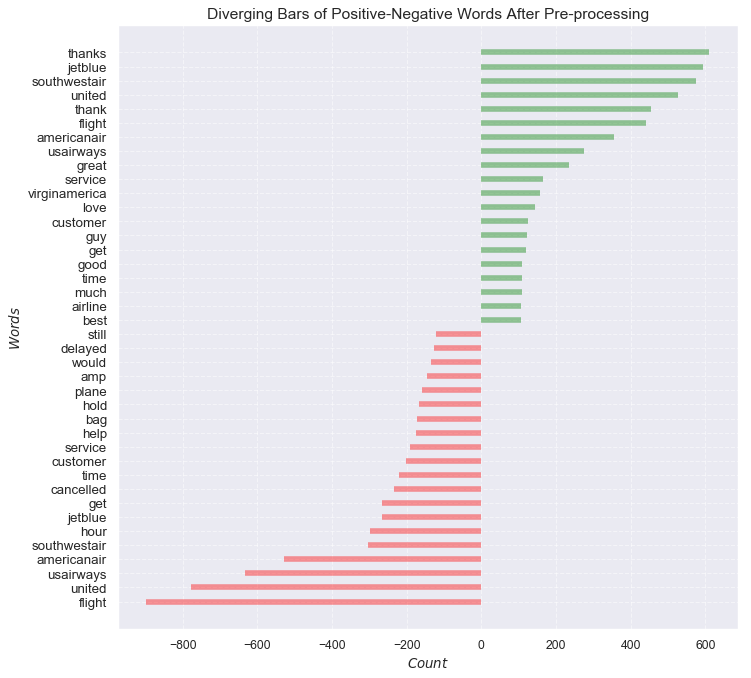

In [36]:
pos = df_downsampled[df_downsampled['airline_sentiment'] == 'positive']
neg = df_downsampled[df_downsampled['airline_sentiment'] == 'negative']

posbiglist = [word.split() for word in pos['cleaned_text']]
negbiglist = [word.split() for word in neg['cleaned_text']]

poslist = []
neglist = []
for sublist in posbiglist:
    for word in sublist:
        poslist.append(word)

for sublist in negbiglist:
    for word in sublist:
        neglist.append(word)
    
pos_count = Counter(poslist)
neg_count = Counter(neglist)

pos_mc = pos_count.most_common(20)
neg_mc = neg_count.most_common(20)

a = pd.DataFrame.from_records(pos_mc,columns=['Word','Counts'])
b = pd.DataFrame.from_records(neg_mc,columns=['Word','Counts'])
b['Counts'] = -b['Counts']
c = a.append(b,ignore_index=True)
c['colors'] = ['red' if x < 0 else 'green' for x in c['Counts']]
c.sort_values('Counts',inplace = True)
c.reset_index(inplace=True)


# Draw plot
plt.figure(figsize=(10,10), dpi= 80)
plt.hlines(y=c.index, xmin=0, xmax=c.Counts, color=c.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Words$', xlabel='$Count$')
plt.yticks(c.index, c.Word, fontsize=12)
plt.title('Diverging Bars of Positive-Negative Words After Pre-processing', fontdict={'size':14})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

In [67]:
def generate_ngrams(s, n):
    token = s.split(" ")
    ngrams = zip(*[token[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

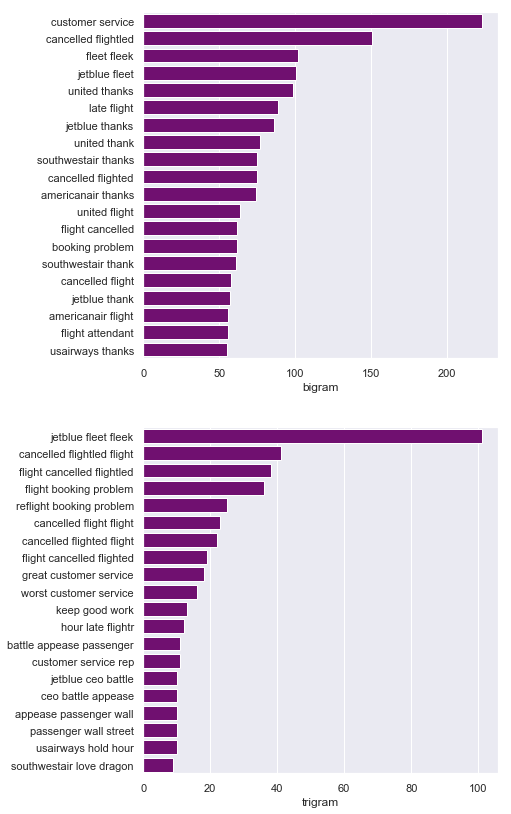

In [120]:
bigrams = df_downsampled.cleaned_text.apply(lambda tweets: generate_ngrams(tweets,2))
trigrams = df_downsampled.cleaned_text.apply(lambda tweets: generate_ngrams(tweets,3))
bigrams_list = []
trigrams_list = []
for item in bigrams:
    for i in item:
        bigrams_list.append(i)

for item in trigrams:
    for i in item:
        trigrams_list.append(i)
c = Counter(bigrams_list)
d = Counter(trigrams_list)
c = pd.DataFrame(c.most_common(20))
d = pd.DataFrame(d.most_common(20))
c.columns = ['bigram','bigram_count']
d.columns = ['trigram','trigram_count']
plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
ax = sns.barplot(x='bigram_count',y='bigram',data=c,color='purple')
ax.set(ylabel="",
       xlabel="bigram")
plt.subplot(2,2,3)
ax = sns.barplot(x='trigram_count',y='trigram',data=d,color='purple')
ax.set(ylabel="",
       xlabel="trigram")
plt.show()

In [37]:
from wordcloud import WordCloud

In [38]:
cleaned_word = ' '.join([word for sentence in df_downsampled['cleaned_text'] for word in sentence.split()])

In [39]:
wordcloud = WordCloud(
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

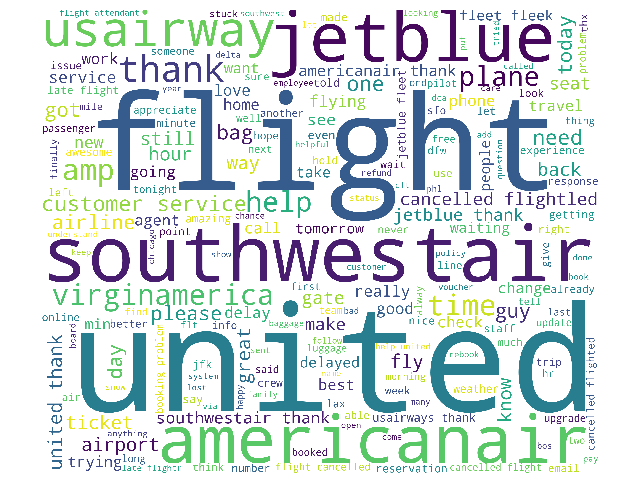

In [40]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [41]:
df_downsampled['cleaned_text'].head()

12334    americanair depends terminal best option arriv...
6424     southwestair travelportland welcome portland s...
12586     americanair expecting delay dfw tomorrow morning
12442                          americanair yesterday phone
13514            americanair southwestair like one ajz ffl
Name: cleaned_text, dtype: object

In [42]:
biglist = list(df_downsampled['cleaned_text'])

In [43]:
biglist[:5]

['americanair depends terminal best option arrive depart breakfast burrito craving update',
 'southwestair travelportland welcome portland sun hood southwest sahvx',
 'americanair expecting delay dfw tomorrow morning',
 'americanair yesterday phone',
 'americanair southwestair like one ajz ffl']

In [44]:
items  = Counter(item for item in biglist)

In [45]:
print(sorted(items,key=items.get,reverse=True)[:5])

['united thank', 'united thanks', 'jetblue thanks', 'southwestair thank', 'americanair thank']


In [46]:
df_downsampled['sentiment'] = df_downsampled['airline_sentiment'].apply(lambda sentiment: 
                                                0 if sentiment == 'negative' 
                                                else (1 if sentiment == 'neutral'
                                                else 2))

In [47]:
df_downsampled['cleaned_text'].head()

12334    americanair depends terminal best option arriv...
6424     southwestair travelportland welcome portland s...
12586     americanair expecting delay dfw tomorrow morning
12442                          americanair yesterday phone
13514            americanair southwestair like one ajz ffl
Name: cleaned_text, dtype: object

In [48]:
X_train,X_test,y_train,y_test = train_test_split(df_downsampled['cleaned_text'],df_downsampled['sentiment'],test_size=0.2,random_state=42)

In [49]:
X_train[:5]

2631     united kept watching safety video first time f...
2675     united right good caught mechanical failure ba...
11069    usairways please change direct flight ric jfk ...
8232     jetblue austin saw water bottle amp snack desk...
5840     southwestair going compensate two plane change...
Name: cleaned_text, dtype: object

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
w = TfidfVectorizer()
count_train = w.fit_transform(X_train)
count_test = w.transform(X_test)

In [51]:
count_traindense = count_train.toarray()
count_testdense = count_test.toarray()

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import SGDClassifier

In [53]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB(),
    MultinomialNB(alpha=1.0),
   SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)]

In [54]:
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        classifier = classifier.fit(count_train,y_train)
        y_pred = classifier.predict(count_test)
    except Exception:
        classifier = classifier.fit(count_traindense,y_train)
        y_pred = classifier.predict(count_testdense)
    accuracy = accuracy_score(y_pred,y_test)
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of LogisticRegression is 0.38928067700987307
Accuracy of KNeighborsClassifier is 0.578984485190409


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVC is 0.32087447108603667
Accuracy of DecisionTreeClassifier is 0.5881523272214386
Accuracy of RandomForestClassifier is 0.6946403385049366
Accuracy of AdaBoostClassifier is 0.6530324400564175
Accuracy of GaussianNB is 0.49647390691114246
Accuracy of MultinomialNB is 0.7122708039492243
Accuracy of SGDClassifier is 0.7235543018335684


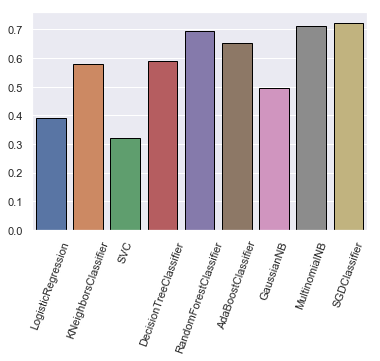

In [55]:
x = sns.barplot(x=Model,y=Accuracy,edgecolor='black')
x.set_xticklabels(Model,rotation=70)
plt.show()

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
for classifier in Classifiers:
    #classifier.get_params()
    print(classifier.__class__.__name__)
    print()
    print(classifier.get_params())
    print()

LogisticRegression

{'C': 1e-09, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 200, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

KNeighborsClassifier

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}

SVC

{'C': 0.025, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

DecisionTreeClassifier

{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weigh

In [58]:
TunedModel = []
TunedAccuracy = []
from sklearn.pipeline import Pipeline
def grid_search():
    
    pipeline1 = Pipeline((
    ('LogisticRegression', LogisticRegression()),
    ))
    
    
    pipeline2 = Pipeline((
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ))

    pipeline3 = Pipeline((
    ('SVC', SVC()),
    ))

    pipeline4 = Pipeline((
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ))
    
    pipeline5 = Pipeline((
    ('RandomForestClassifier', RandomForestClassifier()),
    ))

    pipeline6 = Pipeline((
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ))
    
    pipeline7 = Pipeline((
    ('GaussianNB', GaussianNB()),
    ))
        
    pipeline8 = Pipeline((
    ('MultinomialNB', MultinomialNB()),
    ))
    
    pipeline9 = Pipeline((
    ('SGDClassifier', SGDClassifier()),
    ))
       
    
    parameters1 = {'LogisticRegression__C': [1e-9,1e-8,1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0,1.0,1.5,2.0,2.5], # learning rate
    'LogisticRegression__max_iter': [1000], # number of epochs
    'LogisticRegression__penalty': ['l2'],
    'LogisticRegression__n_jobs': [-1],
    'LogisticRegression__solver':['liblinear']}
  
  
    parameters2 = {'KNeighborsClassifier__n_neighbors':[5,6,7,8,9,10],
          'KNeighborsClassifier__leaf_size':[20,30],
          'KNeighborsClassifier__weights':['uniform', 'distance'],
          'KNeighborsClassifier__algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'KNeighborsClassifier__n_jobs':[-1]}

    parameters3 = {'SVC__C': [1, 10], 
          'SVC__kernel': ['linear','rbf'],
                  'SVC__random_state':[123]}

    
    parameters4 = {'DecisionTreeClassifier__max_features': ['auto', 'sqrt', 'log2'],
          'DecisionTreeClassifier__min_samples_split': [2,3,10],
          'DecisionTreeClassifier__min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'DecisionTreeClassifier__random_state':[123]}
    
    parameters5 = {'RandomForestClassifier__criterion':['gini','entropy'],
          'RandomForestClassifier__n_estimators':[200],
          'RandomForestClassifier__min_samples_leaf':[1,2,3],
          'RandomForestClassifier__min_samples_split':[2,3,10], 
          'RandomForestClassifier__random_state':[123],
          'RandomForestClassifier__n_jobs':[-1]}
  
    parameters6 = {'AdaBoostClassifier__algorithm': ['SAMME.R'], 
                   'AdaBoostClassifier__learning_rate': [1.0,0.1,0.01,2,3,4], 
                   'AdaBoostClassifier__n_estimators': [100], 'AdaBoostClassifier__random_state': [123]}
    
    
    parameters7 = {'GaussianNB__var_smoothing': [1e-9,1e-8,1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0]}
    
    parameters8 = {'MultinomialNB__alpha': [0.01,0.1,1.0]}

    parameters9 = {'SGDClassifier__alpha': [1e-9,1e-8,1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0], # learning rate
    'SGDClassifier__max_iter': [1000], # number of epochs
    'SGDClassifier__loss': ['hinge','log'], 
    'SGDClassifier__penalty': ['l2'],
    'SGDClassifier__n_jobs': [-1]}
  
    pars = [parameters1, parameters2, parameters3, parameters4,parameters5,parameters6,parameters7,parameters8,parameters9]
    pips = [pipeline1, pipeline2, pipeline3, pipeline4,pipeline5,pipeline6,pipeline7,pipeline8,pipeline9]

    print ("starting Gridsearch----------------------------------------------------------")
    for i in range(len(pars)):
        gs = GridSearchCV(pips[i], pars[i], verbose=2, n_jobs=-1,scoring = 'accuracy',cv=10)
        try:
            gs = gs.fit(count_train, y_train)
            y_pred = gs.predict(count_test)
        except Exception:
            gs = gs.fit(count_traindense, y_train)
            y_pred = gs.predict(count_testdense)
        
        print ('Best score is: ' + str(gs.best_score_))
        print('Best params : ' + str(gs.best_params_))
        print()
        
        accuracy = accuracy_score(y_test,y_pred)
        try:
            print('Accuracy of ' + str(gs.estimator.steps[0][0]) + ' is: '+ str(accuracy))
        except Exception:
            print('Accuracy is: '+ str(accuracy))
        print()
        print ("finished Gridsearch-------------------------------------------------------")
        TunedModel.append(gs.estimator.steps[0][0])
        TunedAccuracy.append(accuracy)

In [59]:
print(grid_search())

starting Gridsearch----------------------------------------------------------
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    5.3s finished
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best score is: 0.7314406630223946
Best params : {'LogisticRegression__C': 1.5, 'LogisticRegression__max_iter': 1000, 'LogisticRegression__n_jobs': -1, 'LogisticRegression__penalty': 'l2', 'LogisticRegression__solver': 'liblinear'}

Accuracy of LogisticRegression is: 0.732722143864598

finished Gridsearch-------------------------------------------------------
Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  1.0min finished


Best score is: 0.6367483688943749
Best params : {'KNeighborsClassifier__algorithm': 'auto', 'KNeighborsClassifier__leaf_size': 20, 'KNeighborsClassifier__n_jobs': -1, 'KNeighborsClassifier__n_neighbors': 10, 'KNeighborsClassifier__weights': 'uniform'}

Accuracy of KNeighborsClassifier is: 0.6389280677009873

finished Gridsearch-------------------------------------------------------
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarnin

Best score is: 0.7335566919414566
Best params : {'SVC__C': 1, 'SVC__kernel': 'linear', 'SVC__random_state': 123}

Accuracy of SVC is: 0.7228490832157969

finished Gridsearch-------------------------------------------------------
Fitting 10 folds for each of 99 candidates, totalling 990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 662 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 990 out of 990 | elapsed:   17.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best score is: 0.5783812378769176
Best params : {'DecisionTreeClassifier__max_features': 'auto', 'DecisionTreeClassifier__min_samples_leaf': 1, 'DecisionTreeClassifier__min_samples_split': 10, 'DecisionTreeClassifier__random_state': 123}

Accuracy of DecisionTreeClassifier is: 0.5691114245416079

finished Gridsearch-------------------------------------------------------
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  9.1min finished


Best score is: 0.7062246517369071
Best params : {'RandomForestClassifier__criterion': 'entropy', 'RandomForestClassifier__min_samples_leaf': 2, 'RandomForestClassifier__min_samples_split': 10, 'RandomForestClassifier__n_estimators': 200, 'RandomForestClassifier__n_jobs': -1, 'RandomForestClassifier__random_state': 123}

Accuracy of RandomForestClassifier is: 0.7038081805359662

finished Gridsearch-------------------------------------------------------
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.8min finished


Best score is: 0.6751895609239993
Best params : {'AdaBoostClassifier__algorithm': 'SAMME.R', 'AdaBoostClassifier__learning_rate': 1.0, 'AdaBoostClassifier__n_estimators': 100, 'AdaBoostClassifier__random_state': 123}

Accuracy of AdaBoostClassifier is: 0.6614950634696756

finished Gridsearch-------------------------------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/pytho

Best score is: 0.6127667078116734
Best params : {'GaussianNB__var_smoothing': 0.1}

Accuracy of GaussianNB is: 0.6459802538787024

finished Gridsearch-------------------------------------------------------
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best score is: 0.6975842003174043
Best params : {'MultinomialNB__alpha': 1.0}

Accuracy of MultinomialNB is: 0.7122708039492243

finished Gridsearch-------------------------------------------------------
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.3s


Best score is: 0.7309116557926292
Best params : {'SGDClassifier__alpha': 0.0001, 'SGDClassifier__loss': 'log', 'SGDClassifier__max_iter': 1000, 'SGDClassifier__n_jobs': -1, 'SGDClassifier__penalty': 'l2'}

Accuracy of SGDClassifier is: 0.732722143864598

finished Gridsearch-------------------------------------------------------
None


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    7.2s finished


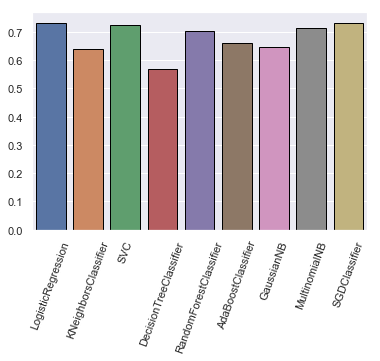

In [60]:
x = sns.barplot(x=TunedModel,y=TunedAccuracy,edgecolor='black')
x.set_xticklabels(TunedModel,rotation=70)
plt.show()

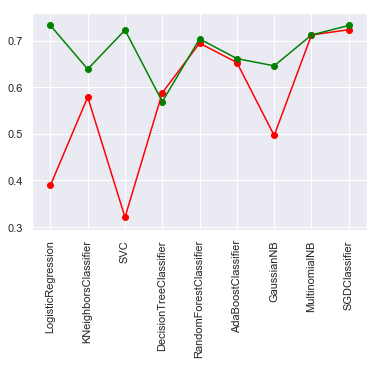

In [61]:
plt.plot(Model,Accuracy,color='red')
plt.plot(TunedModel,TunedAccuracy,color='green')
plt.scatter(Model,Accuracy,color='red')
plt.scatter(TunedModel,TunedAccuracy,color='green')
plt.xticks(Model,rotation=90)
plt.show()

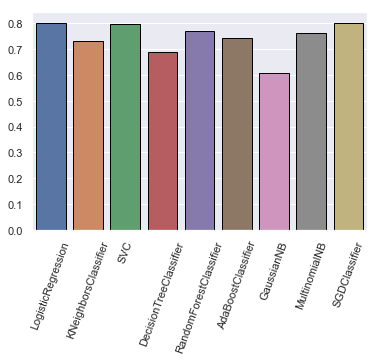

In [785]:
#Before normalizing
x = sns.barplot(x=TunedModel,y=TunedAccuracy,edgecolor='black')
x.set_xticklabels(TunedModel,rotation=70)
plt.show()

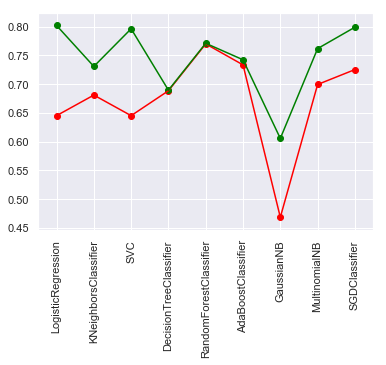

In [805]:
#Before normalizing
plt.plot(Model,Accuracy,color='red')
plt.plot(TunedModel,TunedAccuracy,color='green')
plt.scatter(Model,Accuracy,color='red')
plt.scatter(TunedModel,TunedAccuracy,color='green')
plt.xticks(Model,rotation=90)
plt.show()